In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10000)

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
raw = pd.read_csv ("../datasets/2018 Merging1h.csv", header=0)
raw.head()

,timestamp,temp_celsius,pression,windspeed_mps,voltage_mean,p3_mean,cosphi_mean,load_factor,is_summer,is_fall,is_winter,is_spring,dayType
0,2018-01-01 00:00:00,23,1010.5,1.5,13.819525,68.987584,0.943439,0.945299,1,0,0,0,0
1,2018-01-01 01:00:00,23,1010.2,1.4,13.723727,68.466381,0.950982,0.945654,1,0,0,0,0
2,2018-01-01 02:00:00,23,1009.9,1.0,13.764526,68.889280,0.951596,0.917237,1,0,0,0,0
3,2018-01-01 03:00:00,23,1009.4,0.5,13.810144,69.693009,0.948811,0.947339,1,0,0,0,0
4,2018-01-01 04:00:00,23,1008.8,0.4,13.851163,69.340223,0.939526,0.932445,1,0,0,0,0


In [22]:
raw['timestamp'] = pd.to_datetime (raw['timestamp'], utc=True)
raw = raw.set_index(raw.timestamp)
raw = raw.drop ('timestamp', axis=1)

raw = raw.set_index(raw.index.tz_convert(None))

In [29]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import math

# split 70% of training 30% of test
X_train, X_test, y_train, y_test = train_test_split(raw.drop('p3_mean', axis=1), raw['p3_mean'], test_size=0.3)

In [32]:
model1 = LinearRegression()
model1.fit (X_train, y_train)
pd.DataFrame(model1.coef_,X_train.columns,columns=['Coefficient'])

,Coefficient
temp_celsius,16.796254
pression,0.814386
windspeed_mps,5.655513
voltage_mean,-292.405383
cosphi_mean,865.863248
load_factor,154.622181
is_summer,-114.090051
is_fall,-93.854634
is_winter,-81.067123
is_spring,-113.137223


MAE:                 66.86723432322545
RMSE:                86.48888182022267
Percentual:          43.576738678364634 %


Text(0, 0.5, 'Valores previstos')

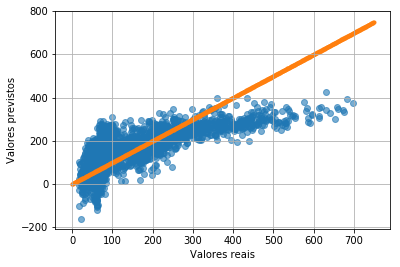

In [35]:
y_hat1 = model1.predict(X_test)

print ("MAE:                ", metrics.mean_absolute_error(y_test, y_hat1))
print ("RMSE:               ", np.sqrt(metrics.mean_squared_error(y_test, y_hat1)))
print ("Percentual:         ", metrics.mean_absolute_error(y_test,y_hat1)/y_test.mean()*100, "%")

# Previsto vs real
line = np.arange(0, 750, 1)

plt.scatter(y_test,y_hat1, Alpha=0.6)
plt.scatter(line,line, marker='.')
plt.grid(True)
plt.xlabel("Valores reais")
plt.ylabel("Valores previstos")

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit (X_train, y_train)
pd.DataFrame(model1.coef_,X.columns,columns=['Coefficient'])

# Random forest algorithm

In [23]:
from sklearn.ensemble import RandomForestRegressor

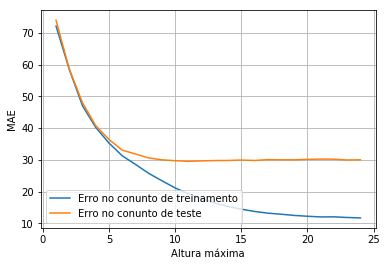

In [24]:
mae1 = {}
mae2 = {}
for k in range(1,25, 1):
    model = RandomForestRegressor(max_depth=k, n_estimators=100, criterion='mae').fit(X_train,y_train)
    y_hat = model.predict(X_train)
    mae1[k] = metrics.mean_absolute_error(y_train,y_hat)
    y_hat = model.predict(X_test)
    mae2[k] = metrics.mean_absolute_error(y_test,y_hat)

plt.figure()
plt.plot(list(mae1.keys()), list(mae1.values()), label='Erro no conunto de treinamento')
plt.plot(list(mae2.keys()), list(mae2.values()), label='Erro no conunto de teste')
plt.legend(loc='lower left')
plt.xlabel("Altura máxima")
plt.ylabel("MAE")
plt.grid(True)

In [25]:
# Random Forest
model = RandomForestRegressor(max_depth=11, n_estimators=100, criterion='mae')
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
# TEST
y_hat = model.predict(X_test)

print ("MAE:                ", metrics.mean_absolute_error(y_test,y_hat))
print ("RMSE:               ", math.sqrt(metrics.mean_squared_error(y_test,y_hat)))
print ("Percentual:         ", metrics.mean_absolute_error(y_test,y_hat)/y_test.mean()*100, "%")


# Feature analysis
print ("=====================================")
print ("FEATURE IMPORTANCE:")
for i in range(model.feature_importances_.size):
    print (X_train.columns[i], "=", model.feature_importances_[i])

MAE:                 29.732627099391124
RMSE:                53.05601937955444
Percentual:          18.933710388930074 %
FEATURE IMPORTANCE:
temp_celsius = 0.24537858350933883
pression = 0.03570560104591004
windspeed_mps = 0.03459669796027694
voltage_mean = 0.052668266045931916
cosphi_mean = 0.25147878938525664
load_factor = 0.10239245382815264
is_summer = 0.007454939378742492
is_fall = 0.005361804383519797
is_winter = 0.00404814669669675
is_spring = 0.005263484443735883
dayType = 0.25565123332243794


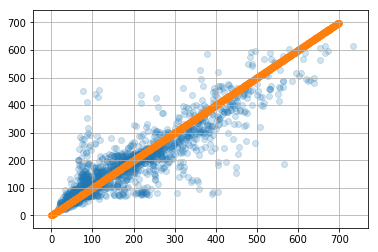

In [27]:
# Previsto vs real
line = np.arange(0, 700, 1)

plt.scatter(y_test,y_hat, Alpha=0.2)
plt.scatter(line,line)
plt.grid(True)

# Interpretation